# Exercise 4

대부분의 도보경주(foot race)에서 모든 사람이 같은 시간에 출발한다. 만약 빠른 주자라면, 초반 경주에서 많은 사람을 앞질러 간다. 하지만, 몇 마일 지난 후에 주위 모든 사람은 같은 속도록 달려간다.

저자가 처음으로 장거리 (209마일) 계주를 뛰었을 때, 저자는 특이한 현상을 알아챘다: 저자가 다른 주자를 따라 잡았을 때, 저자는 통상 훨씬 더 빠르고, 또다른 주자가 저자를 따라 잡았을 때, 또다른 주자가 저자보다 훨씬 더 빠르다.

처음에, 저자는 선수속도 분포가 이봉이라고 생각했다; 즉, 속도가 느린 주자와 속도가 빠른 주자, 하지만 저자와 같은 속도는 소수.

그리고 나서, 저자가 학급크기 효과와 유사한 편향의 희생자임을 인식하게 되었따. 경주는 두가지 방식으로 일반적이 않다: 스태거드 스타트(Staggered Start)를 사용해서, 다른 시점에 팀을 지어 출발한다; 그래서 다른 수준의 능력을 갖는 주자가 많은 팀에 포함된다.

결과적으로, 주자는 속도와 장소에 거의 관계없이 경주과정을 통해서 쭉 펼쳐지게 된다. 저자가 경주에 참가했을 때, 저자 주위 참가자는 (상당히) 경주에 참가한 임의 표본이다.

그래서, 편향은 어디서 나오는 것일까? 경주를 진행하는 동안, 저자가 경주자를 추월하고, 추월당하는 가능성은 속도 차이에 비례한다. 저자가 느린 주자를 따라잡을 것 같고, 빠른 주자에 따라잡힐 듯 하다. 하지만, 같은 속도를 갖는 주자는 서로를 보지 못할 듯 하다.

ObservedPmf로 불리는 함수를 작성한다. 작성한 함수는 주자 속도와 달리는 관측자의 속도에 대한 실제 분포를 나타내는 Pmf를 인자로 받고, 관측자가 본 경주자의 분포를 나타내는 새로운 Pmf를 반환한다.

작성한 함수를 테스트하는데, relay.py를 사용할 수 있는데, 마이애미 Dedham에서 열린 10 킬로미터 제임스 조이스 경주(James Joyce Ramble)에서 나온 결과를 읽고 각 주자의 속도를 mph로 변환한다.

만약 7.5 mph로 해당 집단 주자와 계주를 달린다면, 관측할 속도 분포를 계산하시오. 이 연습문제 대한 해답은 relay_soln.py에 나와있다.

In [1]:
%matplotlib inline
import pandas as pd

The chance of observing a runner is proportional to the difference in speed.

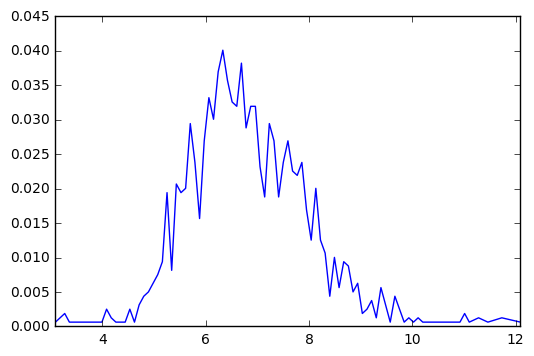

In [2]:
import relay

results = relay.ReadResults()
speeds = relay.GetSpeeds(results)
speeds = relay.BinData(speeds, 3, 12, 100)

pmf = pd.Series(speeds).value_counts().sort_index()
pmf /= pmf.sum()
pmf.plot.line()

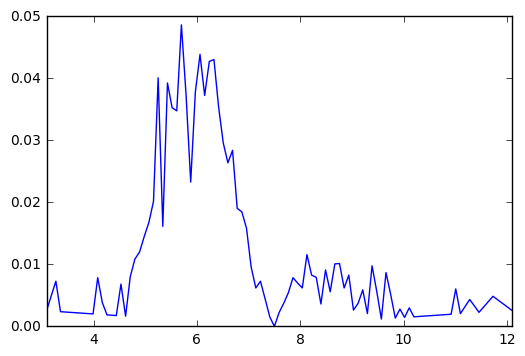

In [3]:
speed = 7.5
observed = pmf.mul(abs(pmf.index - speed))
observed /= observed.sum()
observed.plot.line()

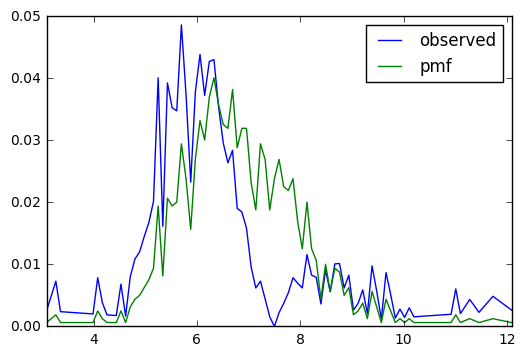

In [4]:
pd.DataFrame({'pmf': pmf, 'observed': observed}).plot.line()